### Predicting ATM Fraud

In this notebook you will learn how to build a classification model with Spark machine learning API (SparkML).

The notebook implements the following steps:
- Perform data understanding and preparation tasks
- Build a model with SparkML API
- Evaluate and test the model

### Use Case

The analytics use case implemented in this notebook is detecting ATM Fraud. While it's a simple use case, it implements all steps from the CRISP-DM methodolody, which is the recommended best practice in data science.
![CRISP-DM](https://raw.githubusercontent.com/rosswlewis/ATM_Fraud/master/assets/crisp_dm.png)

Use case implementation starts with defining the business problem and identifying the data that can be used to solve the problem. For ATM fraud, we use historical transaction data. We also know which transactions are fraud, which is the critical information for building predictive models. In the next step, we use visual APIs for data understanding and complete some data preparation tasks. In a typical analytics project data preparation will include more steps (for example, formatting data or deriving new variables). 

Once the data is ready, we can build a predictive model. In our example we show implementaiton of SparkML *Logistic Regression* and *Random Forrest* classification models. Classification is a statistical technique which assigns a "class" to each customer record (for our use case "fraud" or "not fraud"). Classification models use historical data to come up with the logic to predict "class", this process is called model training. After the model is created, it's usually evaluated using another data set. 

In [2]:
# The code was removed by Watson Studio for sharing.

[Row(ATM_ID='ATM_S0', SHORTNAM='NWST', CARDHOLD='Card_S1', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='716', MAKE='TRITON', MODEL='9670', FACILITI='ND S/C 100P', ATM_POSI='Petrol Station', INSTITUT='SECU', POST_COD_Town='Belfast', POST_COD_Region='Northern Ireland', Day of Week='5. Thursday', Time of Day='21', Time of Day Band='4. Evening (6pm to 10pm)'),
 Row(ATM_ID='ATM_S2', SHORTNAM='BOI', CARDHOLD='Card_S3', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='152', MAKE='NCR', MODEL='5884', FACILITI='ND S/C 100P', ATM_POSI='Convenience Store', INSTITUT='SECU', POST_COD_Town='Belfast', POST_COD_Region='Northern Ireland', Day of Week='6. Friday', Time of Day='21', Time of Day Band='4. Evening (6pm to 10pm)'),
 Row(ATM_ID='ATM_S4', SHORTNAM='LLDS', CARDHOLD='Card_S5', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='158', MAKE='NCR', MODEL='5085', FACILITI='ND S/C 100P', ATM_POSI='Supermarket', INSTITUT='SECU', POST_COD_Town='Edinburgh', POST_COD_Region='Scotland', Day of Week='2. Mond

### Step 1: Load the Data

In [3]:
# The code was removed by Watson Studio for sharing.

[Row(ATM_ID='ATM_S0', SHORTNAM='NWST', CARDHOLD='Card_S1', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='716', MAKE='TRITON', MODEL=9670, FACILITI='ND S/C 100P', ATM_POSI='Petrol Station', INSTITUT='SECU', POST_COD_Town='Belfast', POST_COD_Region='Northern Ireland', Day of Week='5. Thursday', Time of Day=21, Time of Day Band='4. Evening (6pm to 10pm)'),
 Row(ATM_ID='ATM_S2', SHORTNAM='BOI', CARDHOLD='Card_S3', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='152', MAKE='NCR', MODEL=5884, FACILITI='ND S/C 100P', ATM_POSI='Convenience Store', INSTITUT='SECU', POST_COD_Town='Belfast', POST_COD_Region='Northern Ireland', Day of Week='6. Friday', Time of Day=21, Time of Day Band='4. Evening (6pm to 10pm)'),
 Row(ATM_ID='ATM_S4', SHORTNAM='LLDS', CARDHOLD='Card_S5', FRAUD_TY='NOT FRAUDULENT', FRAUD='0', ISSUER_I='158', MAKE='NCR', MODEL=5085, FACILITI='ND S/C 100P', ATM_POSI='Supermarket', INSTITUT='SECU', POST_COD_Town='Edinburgh', POST_COD_Region='Scotland', Day of Week='2. Monday', Time 

If the first step ran successfully (you saw the output), then continue reviewing the notebook and running each code cell step by step. Note that not every cell has a visual output. The cell is still running if you see a * in the brackets next to the cell. 

If the first step didn't finish successfully, check with the instructor. 

### Step 2: Data Understanding

In [4]:
# The show funtion provides a better view of the data than the take() method
historicalATMFraud.show()

+-------+--------+--------+--------------------+-----+--------+------+-----+-----------+-----------------+--------+-------------------+----------------+------------+-----------+--------------------+
| ATM_ID|SHORTNAM|CARDHOLD|            FRAUD_TY|FRAUD|ISSUER_I|  MAKE|MODEL|   FACILITI|         ATM_POSI|INSTITUT|      POST_COD_Town| POST_COD_Region| Day of Week|Time of Day|    Time of Day Band|
+-------+--------+--------+--------------------+-----+--------+------+-----+-----------+-----------------+--------+-------------------+----------------+------------+-----------+--------------------+
| ATM_S0|    NWST| Card_S1|      NOT FRAUDULENT|    0|     716|TRITON| 9670|ND S/C 100P|   Petrol Station|    SECU|            Belfast|Northern Ireland| 5. Thursday|         21|4. Evening (6pm t...|
| ATM_S2|     BOI| Card_S3|      NOT FRAUDULENT|    0|     152|   NCR| 5884|ND S/C 100P|Convenience Store|    SECU|            Belfast|Northern Ireland|   6. Friday|         21|4. Evening (6pm t...|
| ATM

In [5]:
# Let's rename some columns - they will display better
historicalATMFraud = historicalATMFraud.withColumnRenamed('POST_COD_Town','CITY')
historicalATMFraud = historicalATMFraud.withColumnRenamed('POST_COD_Region','REGION')
historicalATMFraud = historicalATMFraud.withColumnRenamed('Day of Week','DAY')
historicalATMFraud = historicalATMFraud.withColumnRenamed('Time of Day','TIME')
historicalATMFraud = historicalATMFraud.withColumnRenamed('Time of Day Band','TIME_BAND')

In [6]:
# Next, we review the data types
historicalATMFraud.dtypes

[('ATM_ID', 'string'),
 ('SHORTNAM', 'string'),
 ('CARDHOLD', 'string'),
 ('FRAUD_TY', 'string'),
 ('FRAUD', 'string'),
 ('ISSUER_I', 'string'),
 ('MAKE', 'string'),
 ('MODEL', 'int'),
 ('FACILITI', 'string'),
 ('ATM_POSI', 'string'),
 ('INSTITUT', 'string'),
 ('CITY', 'string'),
 ('REGION', 'string'),
 ('DAY', 'string'),
 ('TIME', 'int'),
 ('TIME_BAND', 'string')]

If you used the generated code to read in data, then the data type for all variables is *string*. Some variables, for example, the FRAUD flag, should be an interger. We can convert data types, but if you have many columns, it may be easier to add the *inferSchema* parameter on data load.

The modified code to read in data will look like this: 

**historicalATMFraud = spark.read\ <BR>
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\ <BR>
  .option('header', 'true')\ <BR>
  .option('inferSchema', 'true')\ <BR>
  .load(cos.url('ATM_Data.csv', 'pyrlabtest-donotdelete-pr-ecn1gj2kpu5dli'))**
  
If you rerun the code to read in data, now **MODEL** and **Time of Day** columns have data type of *int*

In [7]:
# Display summary statistics
historicalATMFraud.describe().show()

+-------+---------+--------+----------+--------------------+-------------------+-----------------+------+-----------------+----------+-----------------+--------+--------+--------------------+-----------+------------------+--------------------+
|summary|   ATM_ID|SHORTNAM|  CARDHOLD|            FRAUD_TY|              FRAUD|         ISSUER_I|  MAKE|            MODEL|  FACILITI|         ATM_POSI|INSTITUT|    CITY|              REGION|        DAY|              TIME|           TIME_BAND|
+-------+---------+--------+----------+--------------------+-------------------+-----------------+------+-----------------+----------+-----------------+--------+--------+--------------------+-----------+------------------+--------------------+
|  count|    21750|   21750|     21750|               21750|              21736|            21749| 21655|            18608|     20109|            21750|   21749|   21721|               21750|      21750|             21750|               21750|
|   mean|     null|    n

In [8]:
# Summary statistics may be difficult to read in the row format, so let's display it in the column format
historicalATMFraud.describe().show(vertical=True)

-RECORD 0-------------------------
 summary   | count                
 ATM_ID    | 21750                
 SHORTNAM  | 21750                
 CARDHOLD  | 21750                
 FRAUD_TY  | 21750                
 FRAUD     | 21736                
 ISSUER_I  | 21749                
 MAKE      | 21655                
 MODEL     | 18608                
 FACILITI  | 20109                
 ATM_POSI  | 21750                
 INSTITUT  | 21749                
 CITY      | 21721                
 REGION    | 21750                
 DAY       | 21750                
 TIME      | 21750                
 TIME_BAND | 21750                
-RECORD 1-------------------------
 summary   | mean                 
 ATM_ID    | null                 
 SHORTNAM  | null                 
 CARDHOLD  | null                 
 FRAUD_TY  | null                 
 FRAUD     | 0.5542928131038926   
 ISSUER_I  | 460.8951048951049    
 MAKE      | null                 
 MODEL     | 5434.098720980223    
 FACILITI  | null   

Since most variables are non-numeric, we will do additional data understanding later. But the first descriptive statistics, **count**, shows us that we may have some invalid values in several columns. We can confirm the row count by using the count() funtion.  

In [9]:
historicalATMFraud.count()

21750

The output of the describe() method showed us that the following columns have less than 21750 records: **FRAUD, ISSUER_I, MAKE, MODEL, FACILITI, ATM_POSI, INSTITUT, CITY**. There are several ways to deal with missing values. Factors such as number of missing values and the importance of the field for modeling should be taken into consideration. 

Since we are focusing on building a model, and not on feature selection/engineering, we will use a simple approach:
- Drop the MODEL and ISSUER_I field (many missing values and not likely useful for prediciton of fraud)
- Drop rows with missing values for the rest of the fields

In [10]:
# Drop columns which we will not use for data understanding and modeling
historicalATMFraud = historicalATMFraud.drop("ATM_ID","MAKE","MODEL","ISSUER_I")
# Display the count of the data frame if we drop the records
historicalATMFraud.na.drop().count()

20072

In [11]:
# Since data frames are not mutable, we have to create a new object with null values removed
historicalATMFraud.count()

21750

In [12]:
historicalATMFraud=historicalATMFraud.na.drop()
# Check record count of the new data frame
historicalATMFraud.count()

20072

### Step 3: Understand the Data with Visualizations

Visualization is one of the most effective ways to understand data. There are several visualization APIs that can be used. In this sample notebook we will use *PixieDust*, which provides an interactive interface for visualizations. <BR>

PixieDust supports Spark data frames, while many other visualization APIs work only with Pandas data frames. <BR>

More information about PixieDust: https://github.com/ibm-cds-labs/pixiedust?cm_mc_uid=78151411419314871783930&cm_mc_sid_50200000=1487962969  <BR>


Using the interactive interface, check the number of fradulent and non-fradulent transactions. It's important that the dataset used for modeling is balanced. 



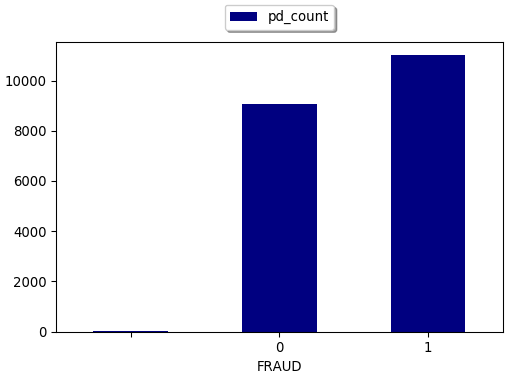

In [13]:
# Run this line once in a notebook
#!pip install --upgrade pixiedust


from pixiedust.display import *
display(historicalATMFraud)

In [14]:
from pixiedust.display import *
display(historicalATMFraud)

SHORTNAM,CARDHOLD,FRAUD_TY,FRAUD,FACILITI,ATM_POSI,INSTITUT,CITY,REGION,DAY,TIME,TIME_BAND
NBS,Card_S162,INTERCEPT,1,FF,Wall,LLDS,Leeds,Yorkshire and Humberside,1. Sunday,11,2. Morning (4am to midday)
BARC,Card_S186,NOT FRAUDULENT,0,FF,Wall,LLDS,Leicester,East Midlands,3. Tuesday,20,4. Evening (6pm to 10pm)
BARC,Card_S214,NOT FRAUDULENT,0,FF,Wall,LLDS,Lincoln,East Midlands,3. Tuesday,14,3. Afternoon (1pm to 5pm)
RBS,Card_S217,AT LEAST 2 TRANSACTIONS EITHER SIDE OF MIDNIGHT,1,FF,Wall,LLDS,Lincoln,East Midlands,4. Wednesday,0,1. Late at Night (11pm - 3am)
BARC,Card_S326,NOT FRAUDULENT,0,FF,Wall,LLDS,Newcastle Upon Tyne,North,1. Sunday,13,3. Afternoon (1pm to 5pm)
YBK,Card_S346,AT LEAST 2 TRANSACTIONS EITHER SIDE OF MIDNIGHT,1,FF,Wall,LLDS,Cleveland,North,6. Friday,0,1. Late at Night (11pm - 3am)
NWST,Card_S388,NOT FRAUDULENT,0,FF,Wall,LLDS,Nottingham,East Midlands,6. Friday,8,2. Morning (4am to midday)
NWST,Card_S751,NOT FRAUDULENT,0,FF,Wall,LLDS,Norwich,East Anglia,2. Monday,14,3. Afternoon (1pm to 5pm)
RBS,Card_S1003,AT LEAST 2 TRANSACTIONS EITHER SIDE OF MIDNIGHT,1,FF,Wall,LLDS,London E,South East,5. Thursday,0,1. Late at Night (11pm - 3am)
RBS,Card_S1116,NOT FRAUDULENT,0,FF,Petrol Station,LLDS,Redhill,South East,4. Wednesday,21,4. Evening (6pm to 10pm)



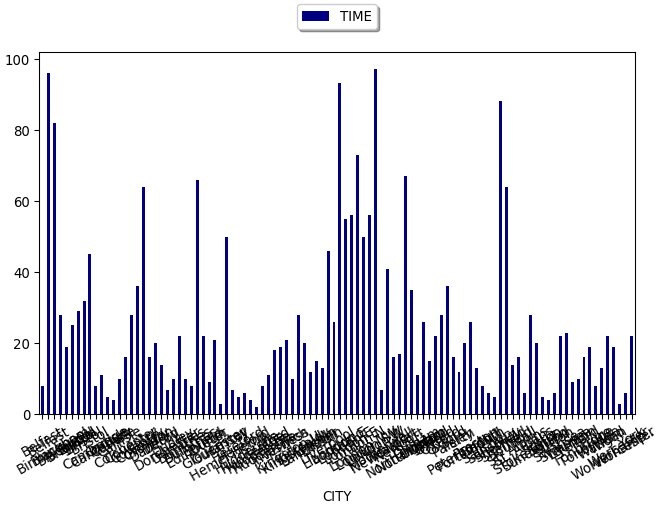

In [15]:
display(historicalATMFraud)

### Step 4: Build the Spark pipeline and the Random Forest models
"Pipeline" is an API in SparkML that's used for building models.
Additional information on SparkML: https://spark.apache.org/docs/2.0.2/ml-guide.html

We are not using all columns for modeling because we can tell that some of them are correlated just by description - *Region* and *City* (we kept *City*), and 
*Time* and *Time Band* (we kept *Time*)<BR>
As mentioned earlier, in a production implementation a data scientist will use statistical and other methods for feature selection. 

In [16]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorIndexer, IndexToString
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler


# This code desribes the steps that should be applied to categorical data for modeling. First, we convert String values to an index, and then we encode them.
# The steps are recorded in teh "stages" object. The indexing/encoding is not applied until we run the Pipeline.fit() method.  
categoricalColumns = ["ATM_POSI", "DAY", "CITY", "SHORTNAM", "CARDHOLD", "FACILITI"]
stages = [] # stages in our Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="FRAUD", outputCol="label")
stages += [label_stringIdx]


In [17]:
# We also have one numeric column
numericCols = ["TIME"]

# The ML API requires that all features are passed in as a single Vector, which we are creating here
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [18]:
partialPipeline = Pipeline().setStages(stages)
# Running this code will apply the string indexing and encoding operations
pipelineModel = partialPipeline.fit(historicalATMFraud)
preppedDataDF = pipelineModel.transform(historicalATMFraud)

In [ ]:
# You can review the data that will be used for modeling
display(preppedDataDF)

In [20]:
### Split data into training and test sets. Set seed for reproducibility
(trainingData, testData) = preppedDataDF.randomSplit([0.8, 0.2], seed=100)
trainingData.cache()
testData.cache()

DataFrame[SHORTNAM: string, CARDHOLD: string, FRAUD_TY: string, FRAUD: string, FACILITI: string, ATM_POSI: string, INSTITUT: string, CITY: string, REGION: string, DAY: string, TIME: int, TIME_BAND: string, ATM_POSIIndex: double, ATM_POSIclassVec: vector, DAYIndex: double, DAYclassVec: vector, CITYIndex: double, CITYclassVec: vector, SHORTNAMIndex: double, SHORTNAMclassVec: vector, CARDHOLDIndex: double, CARDHOLDclassVec: vector, FACILITIIndex: double, FACILITIclassVec: vector, label: double, features: vector]

In [21]:
# First, we'll build a logistic regression model

from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData)

In [ ]:
# Make predictions on test data using the transform() method.
predictions = lrModel.transform(testData)
display(predictions)

In [23]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model - the displayed evaluation is AUC ROC
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.7006843355523025

In [25]:
# Next, we will build a Random Forest model
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData)

In [26]:
# Make predictions on test data using the Transformer.transform() method.
rf_predictions = rfModel.transform(testData)

# Evaluate model
rf_evaluator = BinaryClassificationEvaluator()
rf_evaluator.evaluate(rf_predictions)

0.5860133086985833

**We have finished building and testing a predictive model.** <BR>
As shown in the diagram of the CRISP-DM process, a data scientist will usually spend more time on refining the model (testing with different features and algorithms). After the desired accuracy is achieved, a model is deployed in production. We will cover deployment in another lab. 